In [1]:
import analytical_solutions
%matplotlib inline

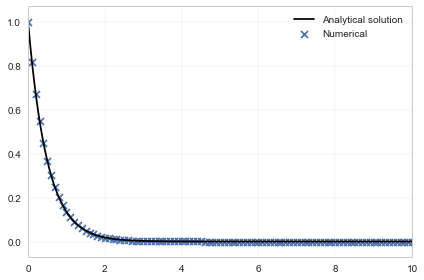

In [3]:
analytical_solutions.reaction_equation_plot()

Simulation started:
	 2017-09-11 21:36:23


Estimated time of the code execution:
	 0h:00m:02s
Will finish approx.:
	 2017-09-11 21:36:26


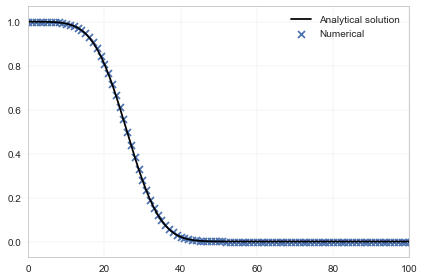

In [4]:
analytical_solutions.transport_equation_plot()

Simulation started:
	 2017-09-11 21:36:26


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-09-11 21:36:27


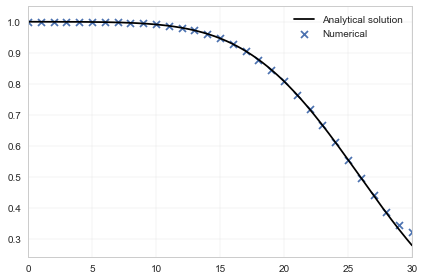

In [5]:
analytical_solutions.transport_equation_boundary_effect()